In [1]:
import pandas as pd

FILENAME = 'results_agent_positional_bias_reasoning.csv'

results_df = pd.read_csv(FILENAME)

print(f'There are {len(results_df)} rows in the dataframe')

results_df.sample(5)

There are 10695 rows in the dataframe


,llm,experiment_name,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index,time_taken
6305,openai/gpt-oss-20b,low reasoning gpt-oss-20b,Find the eBay selling price for vintage Pokemo...,ebay_price_tool,"[('ebay_price_tool', '{""condition"":""used"",""ite...","['serp_tool', 'file_storage_tool', 'calendar_s...",ebay_price_tool,4,4.0,0.444327
6766,claude-sonnet-4-0,reasoning anthropic claude sonnet 4,What are the current gas prices in Chicago?,serp_tool,"[('serp_tool', {'query': 'current gas prices C...","['social_media_tool', 'database_query_tool', '...",serp_tool,3,3.0,3.970888
2636,qwen/qwen3-32b,reasoning qwen3 32b,"Convert this French text to English: ""Bonjour,...",translation_tool,"[('translation_tool', '{""source_language"":""fr""...","['crm_contact_tool', 'calendar_scheduling_tool...",translation_tool,4,4.0,0.783016
2799,claude-sonnet-4-0,reasoning anthropic claude sonnet 4,Extract all text from the contract.pdf file,pdf_document_tool,"[('pdf_document_tool', {'action': 'extract_tex...","['google_spreadsheet_tool', 'crm_contact_tool'...",pdf_document_tool,4,4.0,3.914802
10193,claude-opus-4-1-20250805,reasoning anthropic claude opus 4.1,Get analytics for my Instagram post from last ...,social_media_tool,"[('social_media_tool', {'platform': 'instagram...","['weather_forecast_tool', 'file_storage_tool',...",social_media_tool,4,4.0,6.742930


In [2]:
results_df = results_df[results_df['initial_message'] != 'What is the weather in San Francisco?']


In [3]:
results_df.dropna()['experiment_name'].value_counts()

experiment_name
no reasoning qwen3 32b                    1002
low reasoning gpt-oss-20b                  997
reasoning qwen3 32b                        989
low reasoning gpt-oss-120b                 944
medium reasoning gpt-oss-20b               905
medium reasoning gpt-oss-120b              845
no reasoning anthropic claude sonnet 4     838
no reasoning anthropic claude opus 4.1     824
reasoning anthropic claude opus 4.1        815
reasoning anthropic claude sonnet 4        805
high reasoning gpt-oss-20b                 794
high reasoning gpt-oss-120b                774
Name: count, dtype: int64

In [4]:
results_df[results_df['chosen_tool_index'].isna()].head()

,llm,experiment_name,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index,time_taken


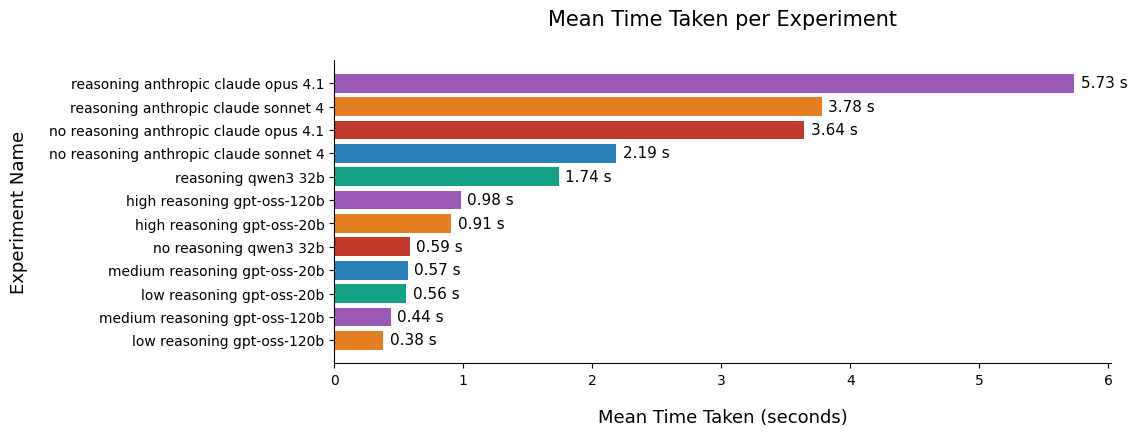

In [5]:
import matplotlib.pyplot as plt

# Calculate mean time taken per experiment
mean_time = results_df.groupby('experiment_name')['time_taken'].mean().sort_values()

# Set up the figure with more padding
fig, ax = plt.subplots(figsize=(12, 5))  # Slightly larger for more space

# Custom colors for prettiness
colors = ['#e67e22', '#9b59b6', '#16a085', '#2980b9', '#c0392b']

# Horizontal bar plot
bars = ax.barh(mean_time.index, mean_time.values, color=colors * (len(mean_time) // len(colors) + 1))

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f'{width:.2f} s', va='center', fontsize=11)

# Prettify
ax.set_xlabel('Mean Time Taken (seconds)', fontsize=13, labelpad=15)
ax.set_ylabel('Experiment Name', fontsize=13, labelpad=15)
ax.set_title('Mean Time Taken per Experiment', fontsize=15, pad=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.subplots_adjust(left=0.32, right=0.98, top=0.88, bottom=0.12)  # Add more padding around plot
plt.tight_layout(pad=3.0)  # Extra padding inside the layout
plt.show()

In [6]:
# accuracy before dropping na
results_df['tool_correct'] = (results_df['correct_tool_index'] == results_df['chosen_tool_index'])
results_df.groupby('experiment_name')['tool_correct'].mean().sort_values()

experiment_name
high reasoning gpt-oss-20b                0.944584
high reasoning gpt-oss-120b               0.966408
low reasoning gpt-oss-20b                 0.967904
medium reasoning gpt-oss-20b              0.974586
medium reasoning gpt-oss-120b             0.986982
reasoning anthropic claude sonnet 4       0.987578
low reasoning gpt-oss-120b                0.989407
reasoning qwen3 32b                       0.991911
no reasoning qwen3 32b                    0.994012
no reasoning anthropic claude sonnet 4    0.995227
reasoning anthropic claude opus 4.1       0.997546
no reasoning anthropic claude opus 4.1    1.000000
Name: tool_correct, dtype: float64

In [7]:
assert results_df.groupby('experiment_name')['tool_correct'].mean().sort_values().mean() < 1

In [8]:
wrong_tool_samples = results_df[results_df['tool_correct'] == False].sample(10)
wrong_tool_samples


,llm,experiment_name,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index,time_taken,tool_correct
10253,openai/gpt-oss-20b,high reasoning gpt-oss-20b,Scrape the main headlines from https://news.yc...,python_repl_tool,"[('python_repl_tool', '{""code"":""import request...","['social_media_tool', 'firecrawl_tool', 'weath...",firecrawl_tool,1,13.0,1.566011,False
4083,openai/gpt-oss-20b,low reasoning gpt-oss-20b,Check the documentation at https://pytorch.org...,serp_tool,"[('serp_tool', '{""query"":""latest PyTorch versi...","['ebay_price_tool', 'crypto_and_nft_tool', 'fi...",firecrawl_tool,2,9.0,0.879850,False
10019,openai/gpt-oss-20b,medium reasoning gpt-oss-20b,Check the documentation at https://pytorch.org...,serp_tool,"[('serp_tool', '{""limit"":1,""query"":""PyTorch la...","['weather_forecast_tool', 'crm_contact_tool', ...",firecrawl_tool,7,11.0,0.604717,False
1604,qwen/qwen3-32b,reasoning qwen3 32b,Find the intro.co link for Sinan Ozdemir,firecrawl_tool,"[('firecrawl_tool', '{""website_url"":""http://in...","['file_storage_tool', 'calendar_scheduling_too...",serp_tool,11,4.0,1.503869,False
5447,openai/gpt-oss-20b,medium reasoning gpt-oss-20b,What is the price of ethereum right now?,serp_tool,"[('serp_tool', '{""query"":""current price of eth...","['serp_tool', 'calendar_scheduling_tool', 'wea...",crypto_and_nft_tool,13,0.0,0.339690,False
10660,claude-sonnet-4-0,reasoning anthropic claude sonnet 4,Find available time slots for a 2-hour meeting...,python_repl_tool,"[('python_repl_tool', {'code': 'from datetime ...","['weather_forecast_tool', 'calendar_scheduling...",calendar_scheduling_tool,1,2.0,7.099226,False
7090,claude-opus-4-1-20250805,reasoning anthropic claude opus 4.1,Show me my calendar for next week,python_repl_tool,"[('python_repl_tool', {'code': 'from datetime ...","['python_repl_tool', 'crm_contact_tool', 'file...",calendar_scheduling_tool,4,0.0,9.760025,False
872,openai/gpt-oss-120b,medium reasoning gpt-oss-120b,Go to https://loopgenius.com and tell me about it,serp_tool,"[('serp_tool', '{""query"":""Loop Genius website""...","['file_storage_tool', 'database_query_tool', '...",firecrawl_tool,2,10.0,0.485698,False
10141,claude-sonnet-4-0,reasoning anthropic claude sonnet 4,Show me my calendar for next week,python_repl_tool,"[('python_repl_tool', {'code': 'from datetime ...","['translation_tool', 'crypto_and_nft_tool', 'w...",calendar_scheduling_tool,7,6.0,7.211012,False
10452,openai/gpt-oss-20b,medium reasoning gpt-oss-20b,Generate a PDF report from the quarterly data,google_spreadsheet_tool,"[('google_spreadsheet_tool', '{""action"":""get_d...","['google_spreadsheet_tool', 'social_media_tool...",pdf_document_tool,10,0.0,0.506809,False


In [9]:
results_df = results_df.dropna()
results_df.isnull().sum()

llm                         0
experiment_name             0
initial_message             0
first_tool_used_by_agent    0
tools_used_by_agent         0
mcp_tool_order              0
expected_tool               0
correct_tool_index          0
chosen_tool_index           0
time_taken                  0
tool_correct                0
dtype: int64

In [10]:
results_df.groupby('experiment_name')['initial_message'].nunique()


experiment_name
high reasoning gpt-oss-120b               63
high reasoning gpt-oss-20b                67
low reasoning gpt-oss-120b                72
low reasoning gpt-oss-20b                 74
medium reasoning gpt-oss-120b             67
medium reasoning gpt-oss-20b              73
no reasoning anthropic claude opus 4.1    62
no reasoning anthropic claude sonnet 4    63
no reasoning qwen3 32b                    73
reasoning anthropic claude opus 4.1       60
reasoning anthropic claude sonnet 4       59
reasoning qwen3 32b                       73
Name: initial_message, dtype: int64

In [11]:
results_df['experiment_name'].value_counts()

experiment_name
no reasoning qwen3 32b                    1002
low reasoning gpt-oss-20b                  997
reasoning qwen3 32b                        989
low reasoning gpt-oss-120b                 944
medium reasoning gpt-oss-20b               905
medium reasoning gpt-oss-120b              845
no reasoning anthropic claude sonnet 4     838
no reasoning anthropic claude opus 4.1     824
reasoning anthropic claude opus 4.1        815
reasoning anthropic claude sonnet 4        805
high reasoning gpt-oss-20b                 794
high reasoning gpt-oss-120b                774
Name: count, dtype: int64

/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/ipykernel_99052/2508279529.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)


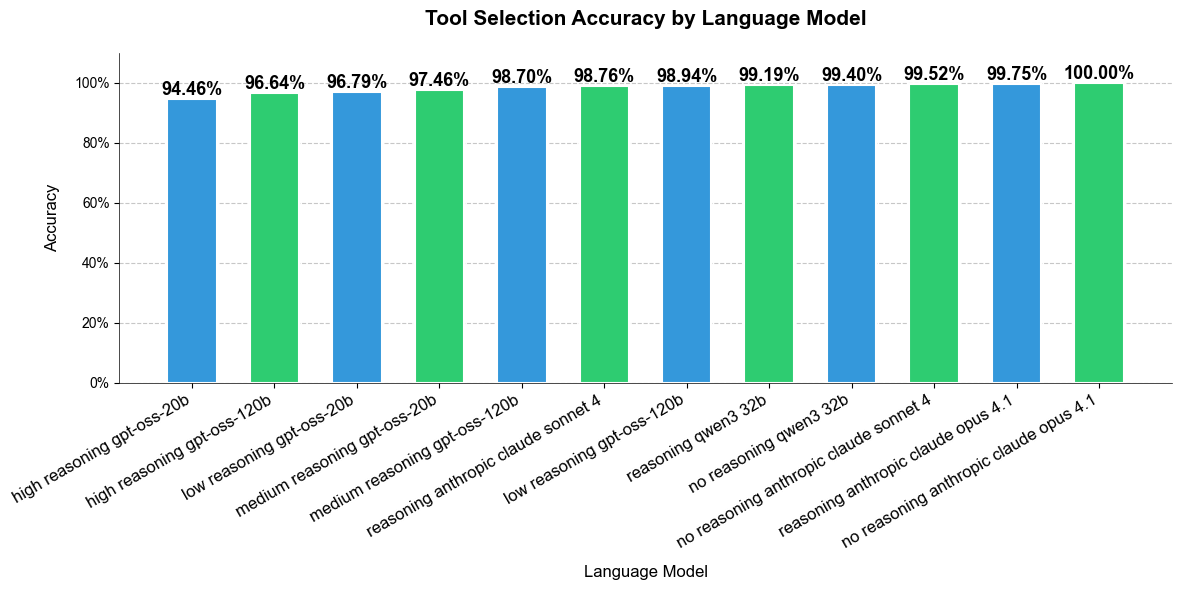

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate mean accuracy
mean_accuracy = results_df.groupby('experiment_name')['tool_correct'].mean().sort_values()

# Custom colors with higher saturation
colors = ['#3498db', '#2ecc71']  # Vibrant blue and green

# Create bars
bars = ax.bar(
    mean_accuracy.index,
    mean_accuracy.values,
    color=colors,
    width=0.6,
    edgecolor='white',
    linewidth=1.5
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.2%}',
        ha='center',
        va='bottom',
        fontsize=13,
        fontweight='bold'
    )

# Customize the plot
ax.set_title('Tool Selection Accuracy by Language Model', 
             pad=20, 
             fontsize=15, 
             fontweight='bold')
ax.set_xlabel('Language Model', fontsize=12, labelpad=10)
ax.set_ylabel('Accuracy', fontsize=12, labelpad=10)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set y-axis limits with some padding
ax.set_ylim(0, min(1.1, max(mean_accuracy.values) * 1.15))

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Rotate x-axis labels
ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig('tool_acc.png', dpi=1000)

In [13]:
# Group by LLM and tool
grouped = results_df.groupby(['experiment_name', 'expected_tool'])

# Compute TP, FP, FN
metrics = []
metrics = []

for llm in results_df['experiment_name'].unique():
    for tool in results_df['expected_tool'].unique():
        df_llm = results_df[results_df['experiment_name'] == llm]

        tp = ((df_llm['first_tool_used_by_agent'] == tool) & (df_llm['expected_tool'] == tool)).sum()
        fp = ((df_llm['first_tool_used_by_agent'] == tool) & (df_llm['expected_tool'] != tool)).sum()
        fn = ((df_llm['first_tool_used_by_agent'] != tool) & (df_llm['expected_tool'] == tool)).sum()

        precision = tp / (tp + fp) if (tp + fp) else 0
        recall = tp / (tp + fn) if (tp + fn) else 0

        metrics.append({
            'experiment_name': llm,
            'tool': tool,
            'precision': precision,
            'recall': recall
        })


metrics_df = pd.DataFrame(metrics)
metrics_df.head()

,experiment_name,tool,precision,recall
0,reasoning anthropic claude opus 4.1,crm_contact_tool,1.0,1.0
1,reasoning anthropic claude opus 4.1,file_storage_tool,1.0,1.0
2,reasoning anthropic claude opus 4.1,firecrawl_tool,1.0,1.0
3,reasoning anthropic claude opus 4.1,database_query_tool,1.0,1.0
4,reasoning anthropic claude opus 4.1,social_media_tool,1.0,1.0


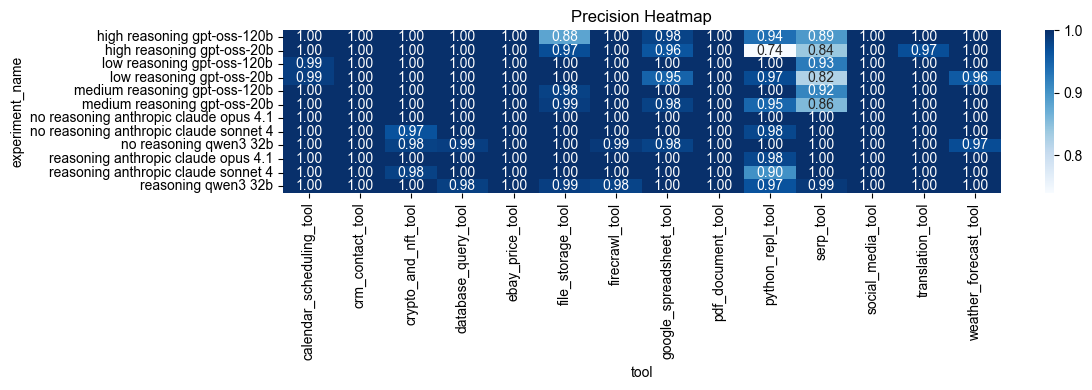

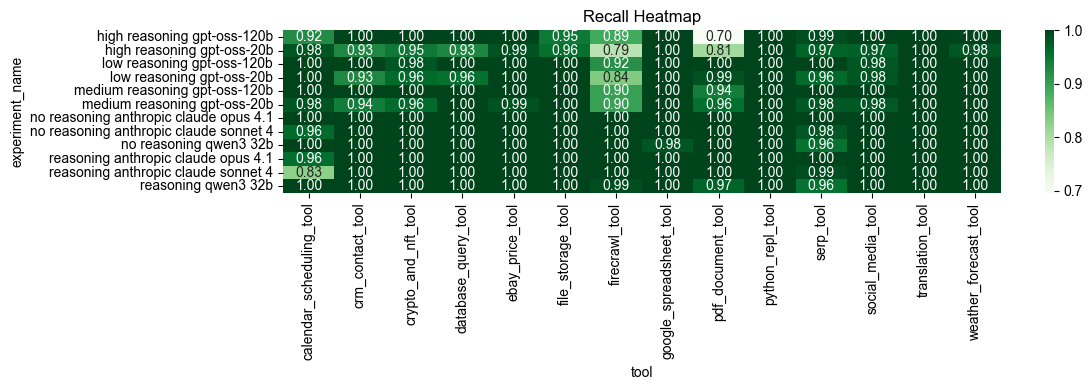

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_precision = metrics_df.pivot(index='experiment_name', columns='tool', values='precision')
pivot_recall = metrics_df.pivot(index='experiment_name', columns='tool', values='recall')

plt.figure(figsize=(12, 4))
sns.heatmap(pivot_precision, annot=True, fmt=".2f", cmap="Blues")
plt.title("Precision Heatmap")
plt.tight_layout()
plt.savefig("precision_heatmap.png", dpi=300)
plt.show()

plt.figure(figsize=(12, 4))
sns.heatmap(pivot_recall, annot=True, fmt=".2f", cmap="Greens")
plt.title("Recall Heatmap")
plt.tight_layout()
plt.savefig("recall_heatmap.png", dpi=300)
plt.show()


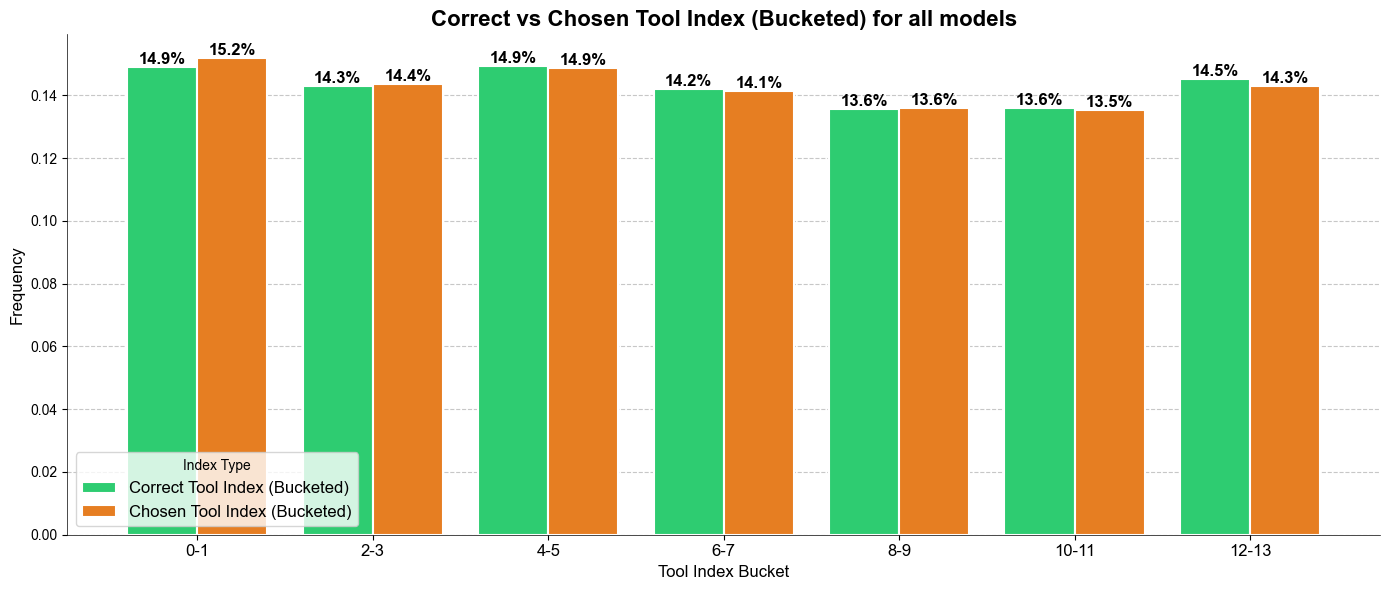

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define bucket size (same as in other graphs)
bucket_size = 2

# Function to bucket indices
def bucket_index(idx):
    return int(idx) // bucket_size

# Drop NaNs and bucket the indices
correct_buckets = results_df['correct_tool_index'].dropna().astype(int).apply(bucket_index)
chosen_buckets = results_df['chosen_tool_index'].dropna().astype(int).apply(bucket_index)

# Get normalized counts for each bucket
correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()
chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()

# Align indices
all_buckets = sorted(set(correct_counts_bucketed.index).union(set(chosen_counts_bucketed.index)))
correct_counts_bucketed = correct_counts_bucketed.reindex(all_buckets, fill_value=0)
chosen_counts_bucketed = chosen_counts_bucketed.reindex(all_buckets, fill_value=0)

# Prepare x locations
x = np.arange(len(all_buckets))
bar_width = 0.4

# Plot side-by-side bars with new colors
fig, ax = plt.subplots(figsize=(14, 6))
bars_correct = ax.bar(
    x - bar_width / 2, correct_counts_bucketed, width=bar_width, color='#2ecc71', edgecolor='white', linewidth=1.5, label='Correct Tool Index (Bucketed)'
)
bars_chosen = ax.bar(
    x + bar_width / 2, chosen_counts_bucketed, width=bar_width, color='#e67e22', edgecolor='white', linewidth=1.5, label='Chosen Tool Index (Bucketed)'
)

# Add value labels on top of each bar
for bars in [bars_correct, bars_chosen]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{round(height * 100, 1)}%',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

# Customize the plot
ax.set_title(f'Correct vs Chosen Tool Index (Bucketed) for all models', fontsize=16, fontweight='bold')
ax.set_xlabel('Tool Index Bucket', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_buckets], fontsize=12)

# Customize grid and spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add legend
ax.legend(title='Index Type', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


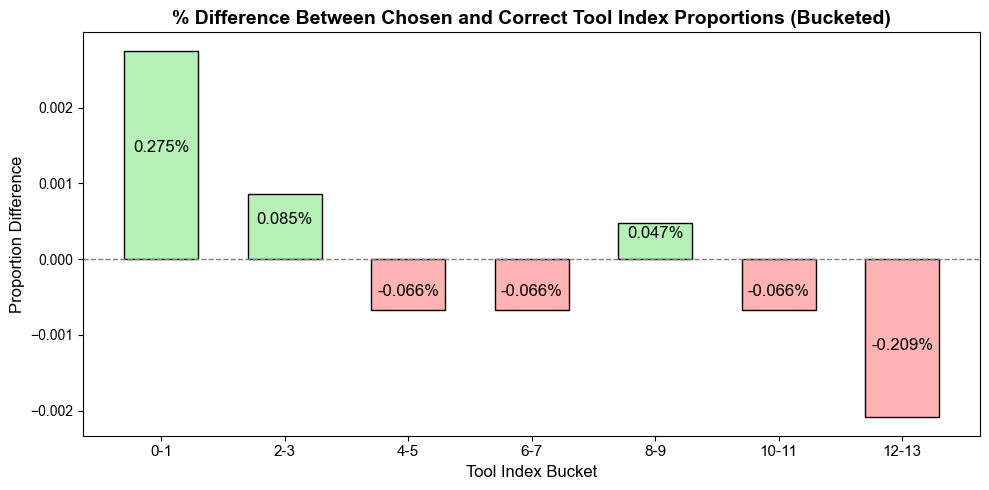

In [16]:
# Define bucket size
bucket_size = 2

# Function to bucket indices
def bucket_index(idx):
    return int(idx) // bucket_size

# Bucket and count correct tool indices
correct_buckets = results_df['correct_tool_index'].dropna().astype(int).apply(bucket_index)
overall_correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()

# Bucket and count chosen tool indices
chosen_buckets = results_df['chosen_tool_index'].dropna().astype(int).apply(bucket_index)
overall_chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()
import matplotlib.pyplot as plt
import numpy as np

# Calculate the difference
bucket_diff = overall_chosen_counts_bucketed - overall_correct_counts_bucketed

# Choose colors: light green for positive, light red for negative
bar_colors = ['#b6f2b6' if v >= 0 else '#ffb3b3' for v in bucket_diff]

# Plot the difference
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(bucket_diff))
ax.bar(x, bucket_diff, color=bar_colors, edgecolor='black', width=0.6)

ax.set_title('% Difference Between Chosen and Correct Tool Index Proportions (Bucketed)', fontsize=14, fontweight='bold')
ax.set_xlabel('Tool Index Bucket', fontsize=12)
ax.set_ylabel('Proportion Difference', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in x], fontsize=11)

# Add value labels
for i, v in enumerate(bucket_diff):
    ax.text(i, v + (-abs(v) / 2 if v >= 0 else abs(v) / 2), f'{v * 100:.3f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=12)

ax.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.tight_layout()
plt.savefig('bucketed_tool_index_difference.png', dpi=300)
plt.show()

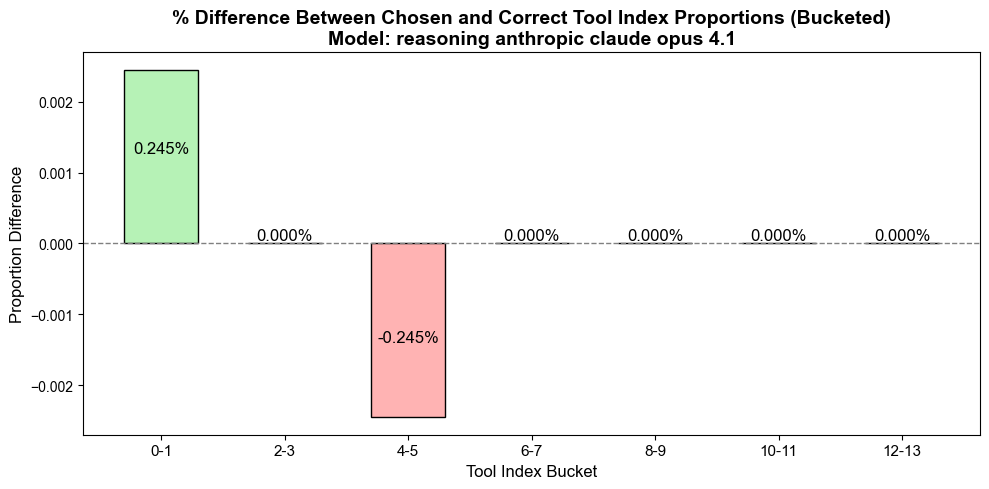

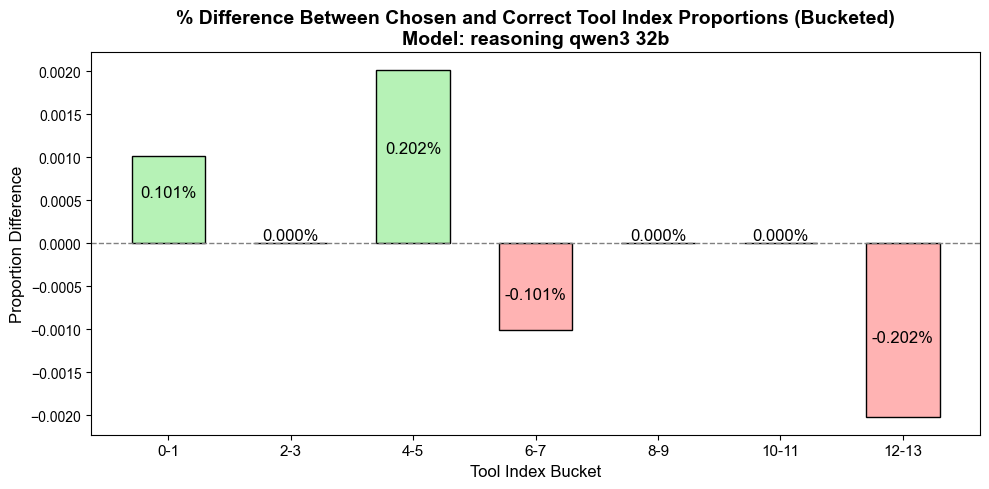

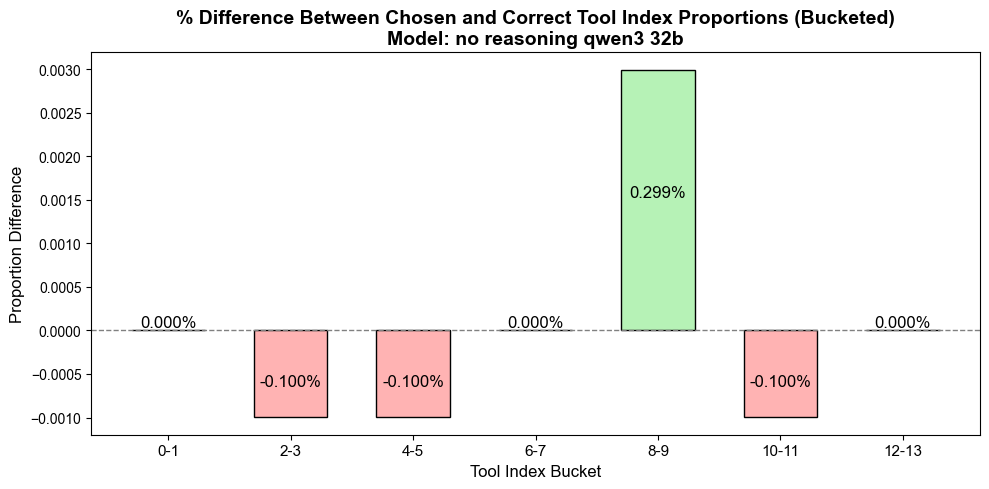

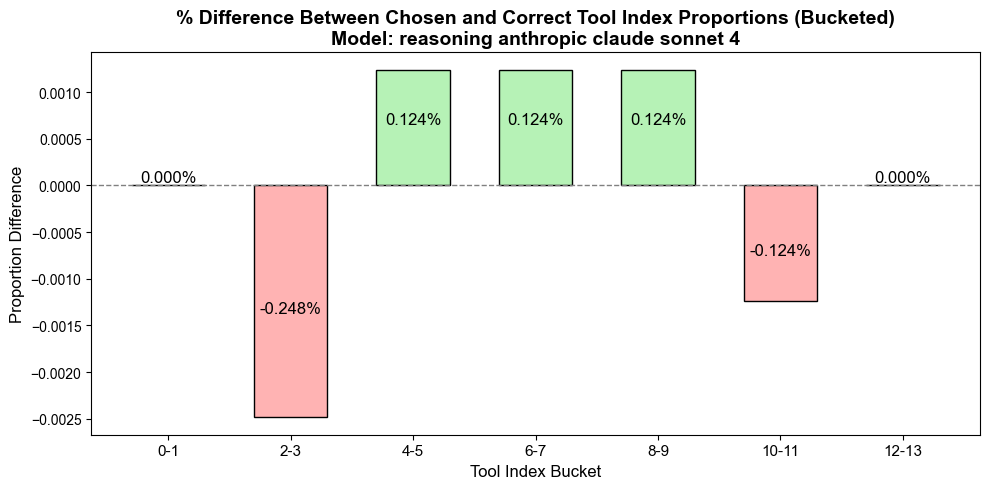

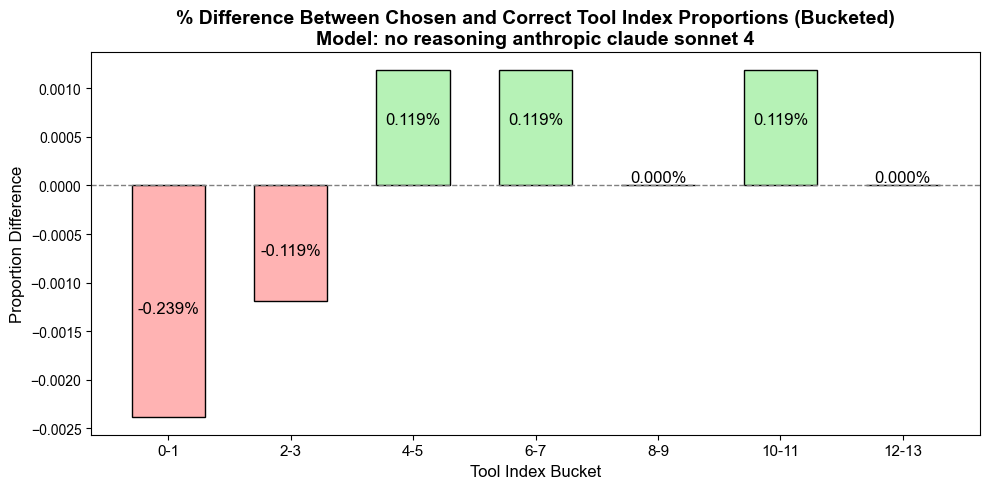

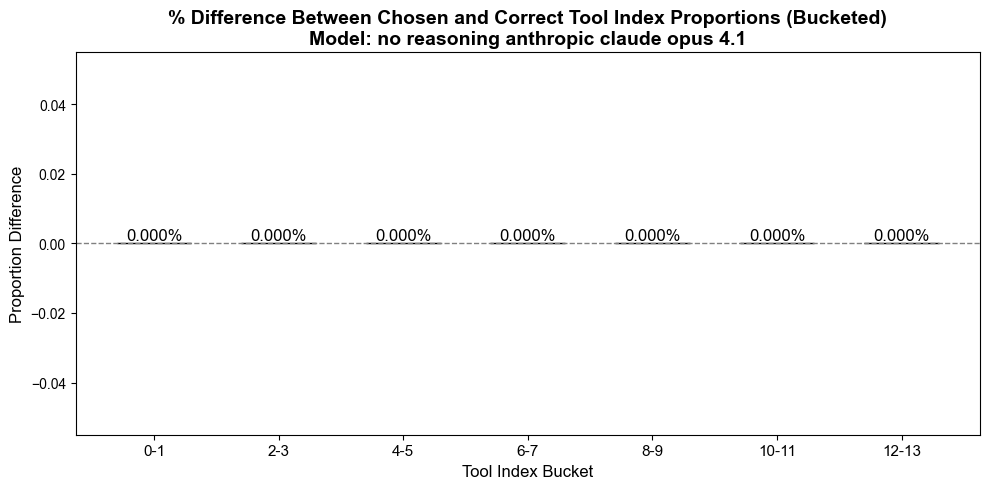

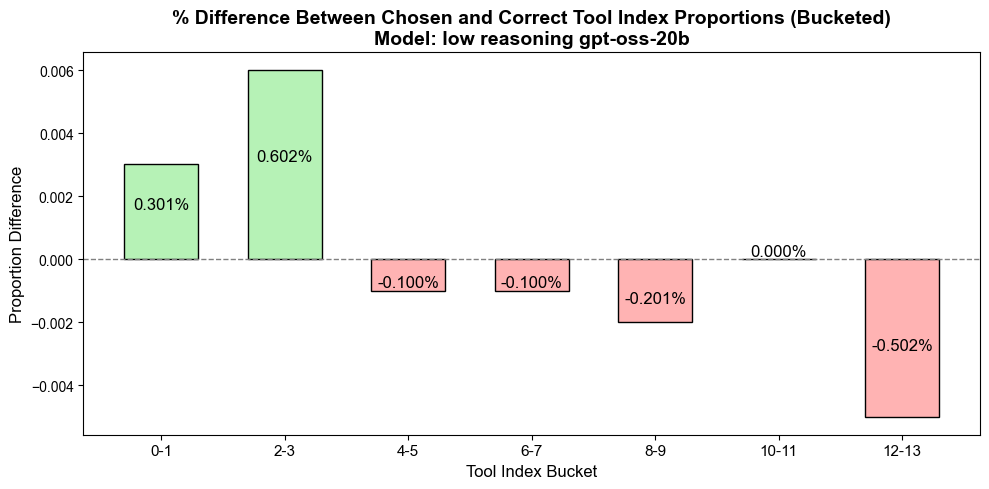

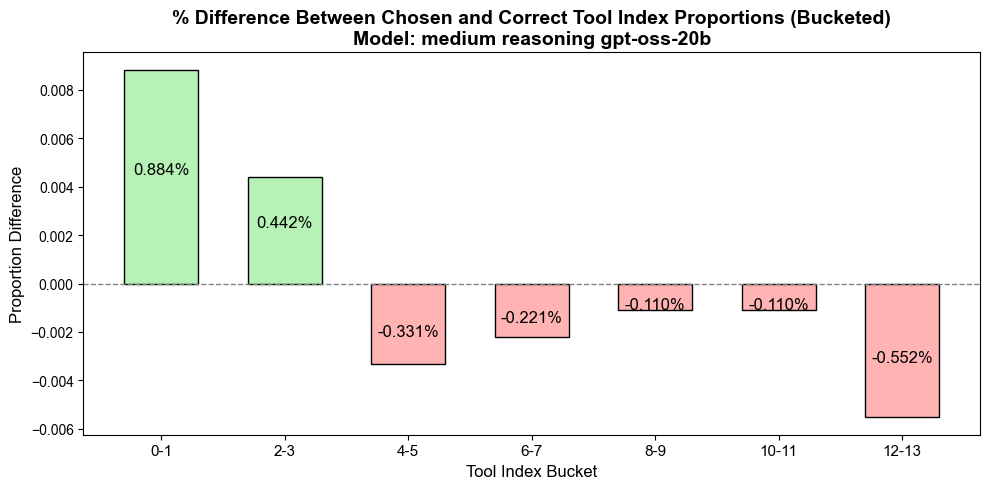

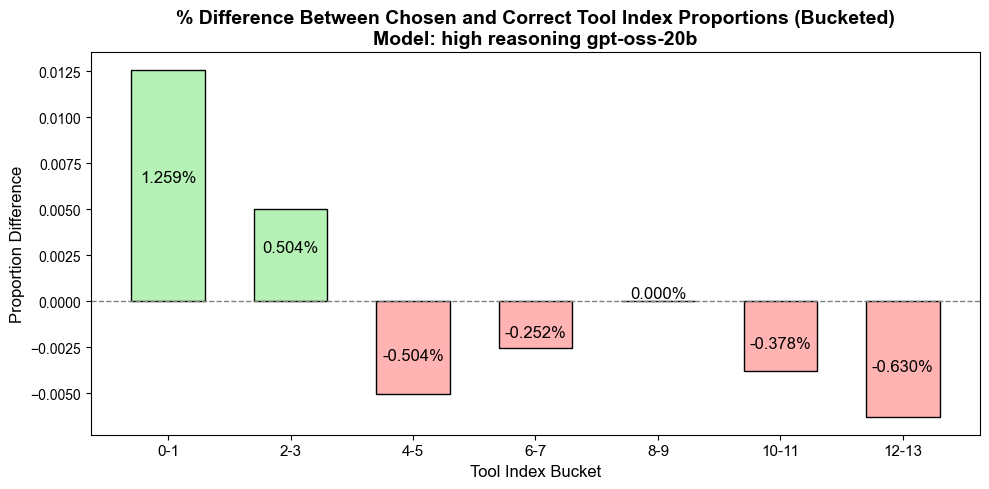

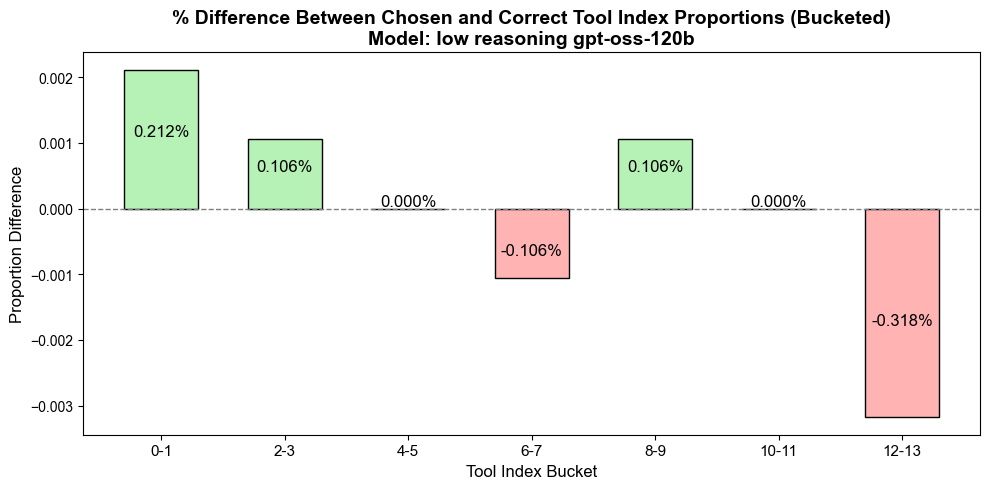

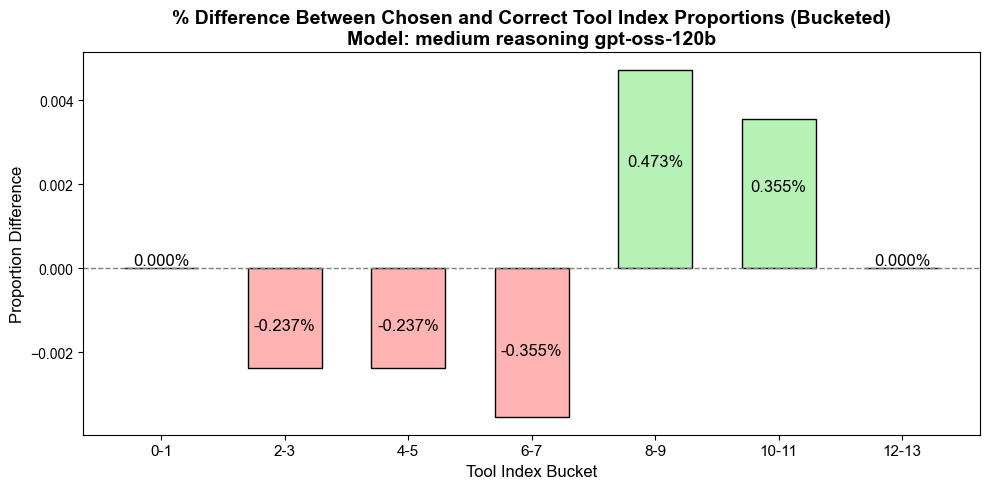

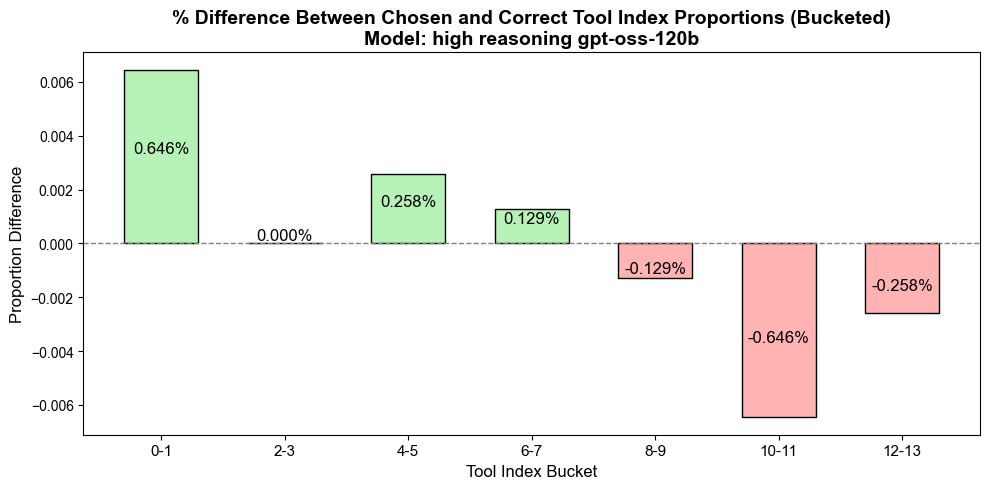

In [17]:
import matplotlib.pyplot as plt
import numpy as np

bucket_size = 2

for MODEL_NAME in results_df['experiment_name'].unique():
    llm_results = results_df[results_df['experiment_name'] == MODEL_NAME].dropna(subset=['correct_tool_index', 'chosen_tool_index'])
    
    # Bucket and count correct tool indices
    correct_buckets = llm_results['correct_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()
    
    # Bucket and count chosen tool indices
    chosen_buckets = llm_results['chosen_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()
    
    # Align indices
    all_buckets = sorted(set(correct_counts_bucketed.index).union(set(chosen_counts_bucketed.index)))
    correct_counts_bucketed = correct_counts_bucketed.reindex(all_buckets, fill_value=0)
    chosen_counts_bucketed = chosen_counts_bucketed.reindex(all_buckets, fill_value=0)
    bucket_diff = chosen_counts_bucketed - correct_counts_bucketed

    bar_colors = ['#b6f2b6' if v >= 0 else '#ffb3b3' for v in bucket_diff]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(all_buckets))
    ax.bar(x, bucket_diff, color=bar_colors, edgecolor='black', width=0.6)

    ax.set_title(f'% Difference Between Chosen and Correct Tool Index Proportions (Bucketed)\nModel: {MODEL_NAME}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Tool Index Bucket', fontsize=12)
    ax.set_ylabel('Proportion Difference', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_buckets], fontsize=11)

    # Add value labels
    for i, v in enumerate(bucket_diff):
        ax.text(i, v + (-abs(v) / 2 if v >= 0 else abs(v) / 2), f'{v * 100:.3f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=12)

    ax.axhline(0, color='gray', linewidth=1, linestyle='--')
    plt.tight_layout()
    plt.savefig(f'bucketed_tool_index_difference_{MODEL_NAME.replace("/", "_")}.png', dpi=300)
    plt.show()


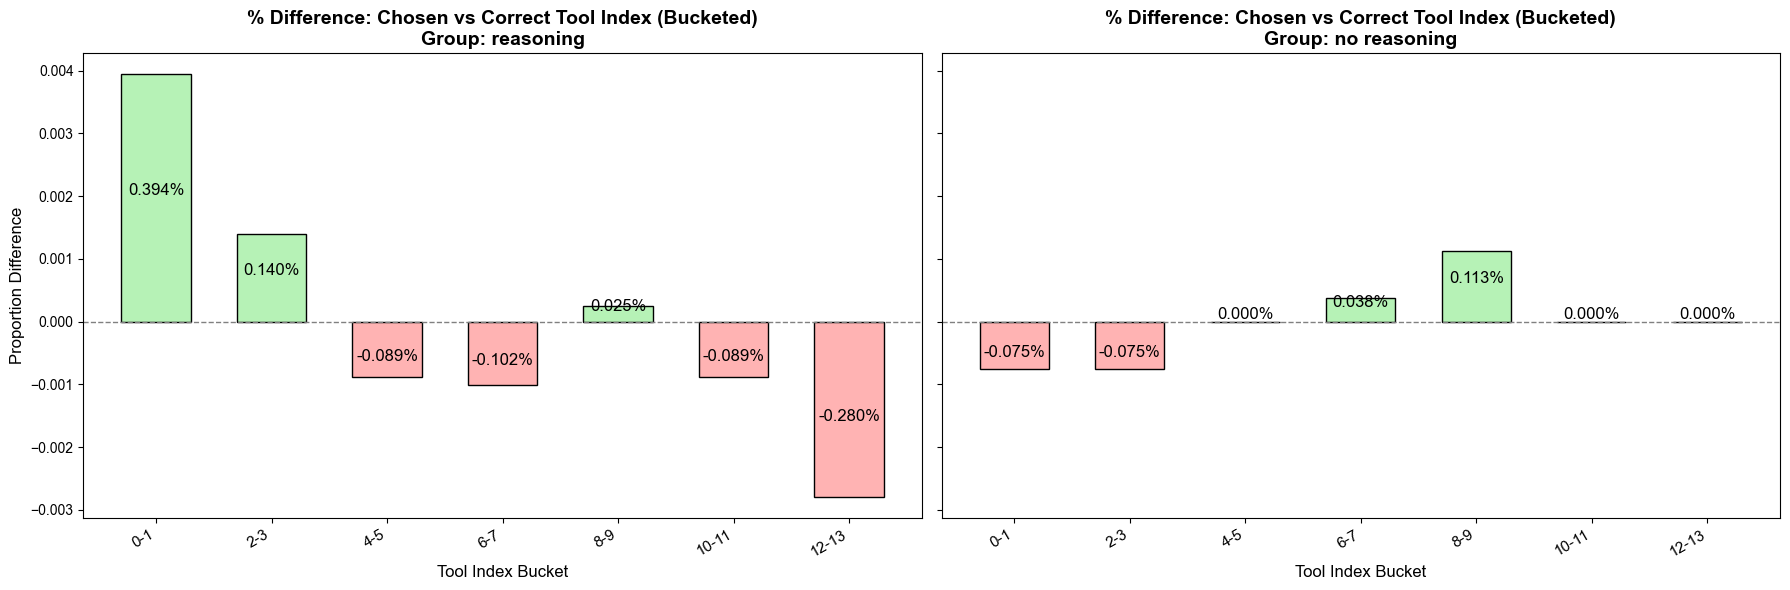

In [18]:
import re

bucket_size = 2

def get_reasoning_group(name):
    """Return 'reasoning' or 'no reasoning' based on experiment name."""
    return "no reasoning" if "no reasoning" in name else "reasoning"

# Assign reasoning group
results_df['reasoning_group'] = results_df['experiment_name'].apply(get_reasoning_group)
groups = ['reasoning', 'no reasoning']

# Prepare data for both groups
bucket_diffs = []
bucket_labels = []
for group in groups:
    group_results = results_df[results_df['reasoning_group'] == group].dropna(subset=['correct_tool_index', 'chosen_tool_index'])
    
    # Bucket and count correct tool indices
    correct_buckets = group_results['correct_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()
    
    # Bucket and count chosen tool indices
    chosen_buckets = group_results['chosen_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()
    
    # Align indices
    all_buckets = sorted(set(correct_counts_bucketed.index).union(set(chosen_counts_bucketed.index)))
    correct_counts_bucketed = correct_counts_bucketed.reindex(all_buckets, fill_value=0)
    chosen_counts_bucketed = chosen_counts_bucketed.reindex(all_buckets, fill_value=0)
    bucket_diff = chosen_counts_bucketed - correct_counts_bucketed

    bucket_diffs.append(bucket_diff)
    bucket_labels.append([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_buckets])

# Find the union of all bucket indices for consistent x-axis
all_bucket_indices = sorted(set().union(*[bd.index for bd in bucket_diffs]))
all_bucket_labels = [f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_bucket_indices]

# Reindex diffs for both groups to have the same x-axis
bucket_diffs = [bd.reindex(all_bucket_indices, fill_value=0) for bd in bucket_diffs]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
for idx, (group, bucket_diff, ax) in enumerate(zip(groups, bucket_diffs, axes)):
    bar_colors = ['#b6f2b6' if v >= 0 else '#ffb3b3' for v in bucket_diff]
    x = np.arange(len(all_bucket_indices))
    ax.bar(x, bucket_diff, color=bar_colors, edgecolor='black', width=0.6)
    ax.set_title(f'% Difference: Chosen vs Correct Tool Index (Bucketed)\nGroup: {group}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Tool Index Bucket', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Proportion Difference', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(all_bucket_labels, fontsize=11, rotation=30, ha='right')

    # Add value labels
    for i, v in enumerate(bucket_diff):
        ax.text(i, v + (-abs(v) / 2 if v >= 0 else abs(v) / 2), f'{v * 100:.3f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=12)

    ax.axhline(0, color='gray', linewidth=1, linestyle='--')

plt.tight_layout()
plt.savefig('bucketed_tool_index_difference_reasoning_vs_no_reasoning.png', dpi=300)
plt.show()
